In [11]:
pip install scikit-plot


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

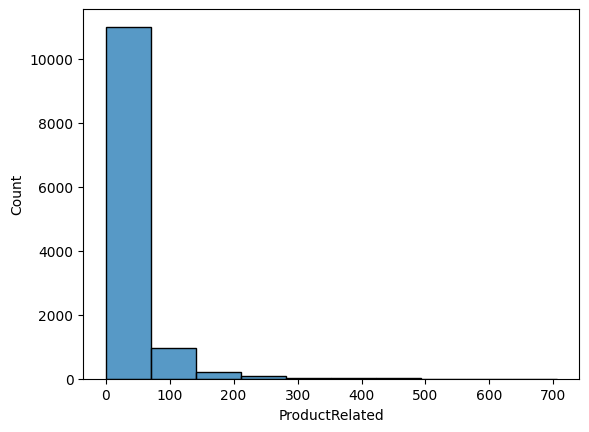

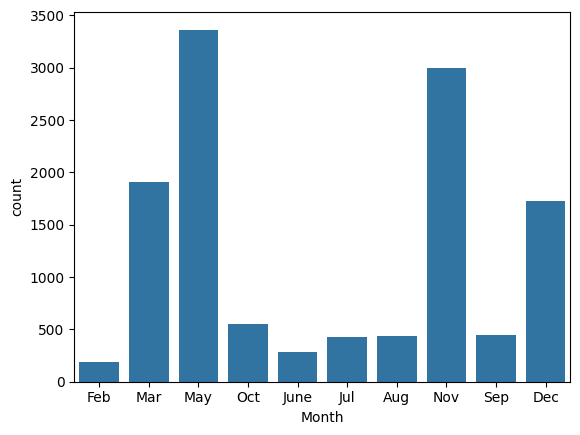

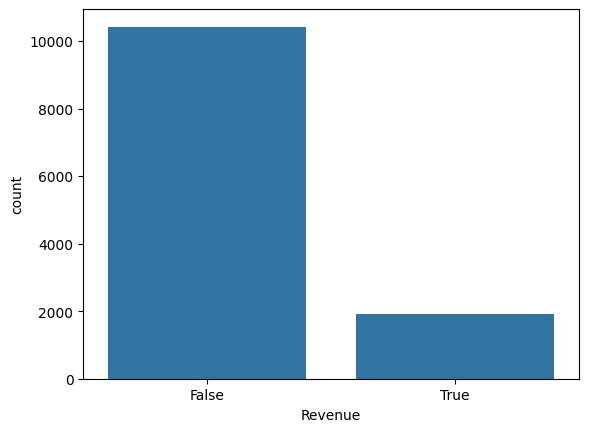

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

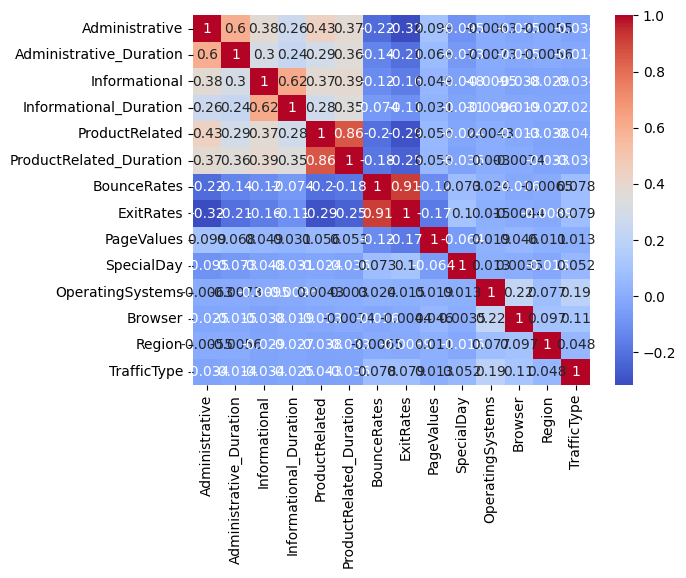

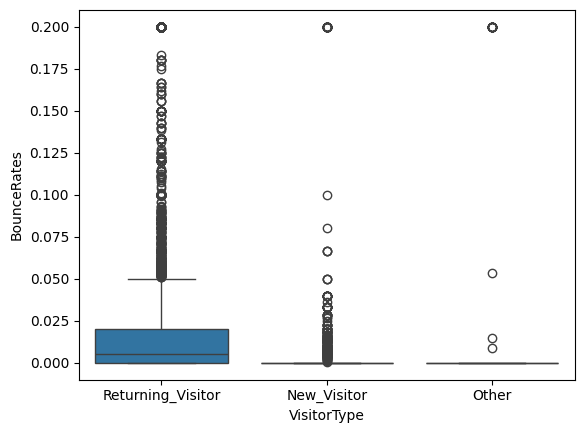

Original class distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64
Resampled class distribution:
Revenue
False    8367
True     8367
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


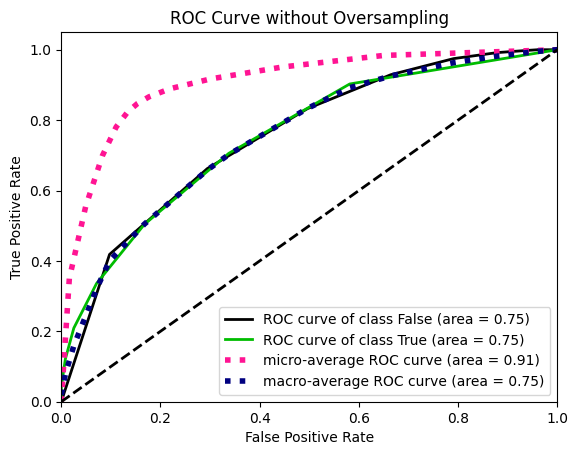

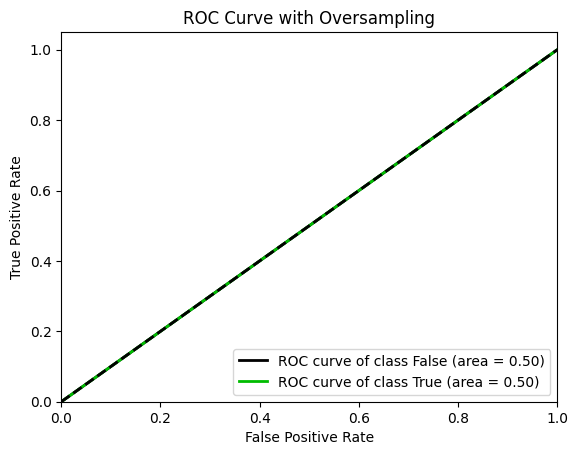

Accuracy score without oversampling: 0.8467153284671532
F1 score without oversampling: 0.2092050209205021
Precision without oversampling: 0.746268656716418
Recall without oversampling: 0.12165450121654502

Accuracy score with oversampling: 0.8333333333333334
F1 score with oversampling: 0.0
Precision with oversampling: 0.0
Recall with oversampling: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:

# Install necessary libraries
!pip install scikit-plot
!pip install imbalanced-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import set_printoptions
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt

# Reading the dataset
df = pd.read_csv("online_shoppers_intention.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

# Displaying summary statistics
print(df.describe().transpose())

# Plotting histograms and count plots
sns.histplot(data=df, x='ProductRelated', bins=10)
plt.show()

sns.countplot(data=df, x='Month')
plt.show()

sns.countplot(data=df, x='Revenue')
plt.show()

# Handle non-numeric data for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])

# Correlation matrix
print(df_numeric.corr())

# Heatmap of the correlation matrix
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

# Box Plot
sns.boxplot(data=df, x='VisitorType', y='BounceRates')
plt.show()

# Feature Engineering
X = df.iloc[:, :-1]  # Selecting all columns except the last one as features
y = df.iloc[:, -1]   # Selecting the last column as the target

# Encode categorical features if necessary
X = pd.get_dummies(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Sampling
print("Original class distribution:")
print(y.value_counts())

# Applying SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:")
print(y_resampled.value_counts())

# Normalization
# Fit the scaler on training data
norm = MinMaxScaler().fit(X_train)

# Transform training and testing data
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Building and training the model
model = KNeighborsClassifier(n_neighbors=11)
model2 = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train_norm, y_train)
model2.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test_norm)
y_pred2 = model2.predict(X_test_norm)

# Plotting ROC Curve and calculating AUC
y_pred_proba = model.predict_proba(X_test_norm)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

y_pred_proba2 = model2.predict_proba(X_test_norm)[:, 1]
auc2 = roc_auc_score(y_test, y_pred_proba2)

# Using scikit-plot for better ROC curve visualization
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test_norm), title="ROC Curve without Oversampling")
skplt.metrics.plot_roc(y_test, model2.predict_proba(X_test_norm), title="ROC Curve with Oversampling", plot_micro=False, plot_macro=False)

plt.show()

# Printing evaluation metrics
print("Accuracy score without oversampling:", accuracy_score(y_test, y_pred))
print("F1 score without oversampling:", f1_score(y_test, y_pred))
print("Precision without oversampling:", precision_score(y_test, y_pred))
print("Recall without oversampling:", recall_score(y_test, y_pred))

print()

print("Accuracy score with oversampling:", accuracy_score(y_test, y_pred2))
print("F1 score with oversampling:", f1_score(y_test, y_pred2))
print("Precision with oversampling:", precision_score(y_test, y_pred2))
print("Recall with oversampling:", recall_score(y_test, y_pred2))
